In [3]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from tensorflow.keras.models  import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Flatten , Dense , Dropout
from tensorflow.keras.callbacks  import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [4]:
file_path = r'dataset_blood_group'


In [5]:
name_class = os.listdir(file_path)
name_class

['.ipynb_checkpoints', 'A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

In [6]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [7]:
filepaths[-6:-1]

['dataset_blood_group\\O-\\cluster_7_964.BMP',
 'dataset_blood_group\\O-\\cluster_7_977.BMP',
 'dataset_blood_group\\O-\\cluster_7_979.BMP',
 'dataset_blood_group\\O-\\cluster_7_985.BMP',
 'dataset_blood_group\\O-\\cluster_7_998.BMP']

In [8]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',

In [9]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels , name = 'Label')
data = pd.concat([filepath , labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,dataset_blood_group\B-\cluster_3_177.BMP,B-
1,dataset_blood_group\AB+\cluster_4_107.BMP,AB+
2,dataset_blood_group\O+\cluster_6_861.BMP,O+
3,dataset_blood_group\O-\cluster_7_4149.BMP,O-
4,dataset_blood_group\O+\cluster_6_856.BMP,O+


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  6000 non-null   object
 1   Label     6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'A-'),
  Text(1, 0, 'O+'),
  Text(2, 0, 'AB-'),
  Text(3, 0, 'B-'),
  Text(4, 0, 'O-'),
  Text(5, 0, 'AB+'),
  Text(6, 0, 'B+'),
  Text(7, 0, 'A+')])

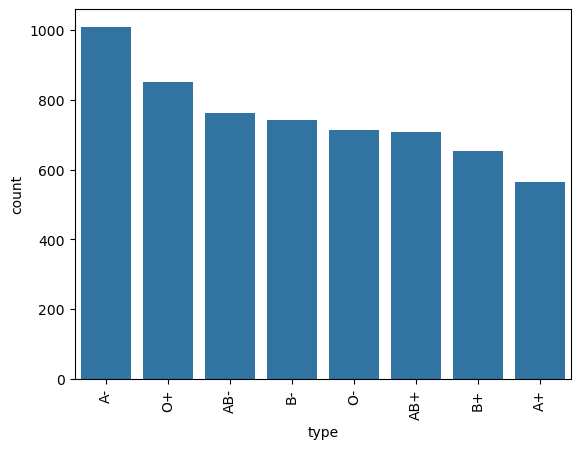

In [11]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index , y =counts)
plt.xlabel('type')
plt.xticks(rotation=90)

In [12]:
train, test = train_test_split(data , test_size = 0.25 , random_state = 42)

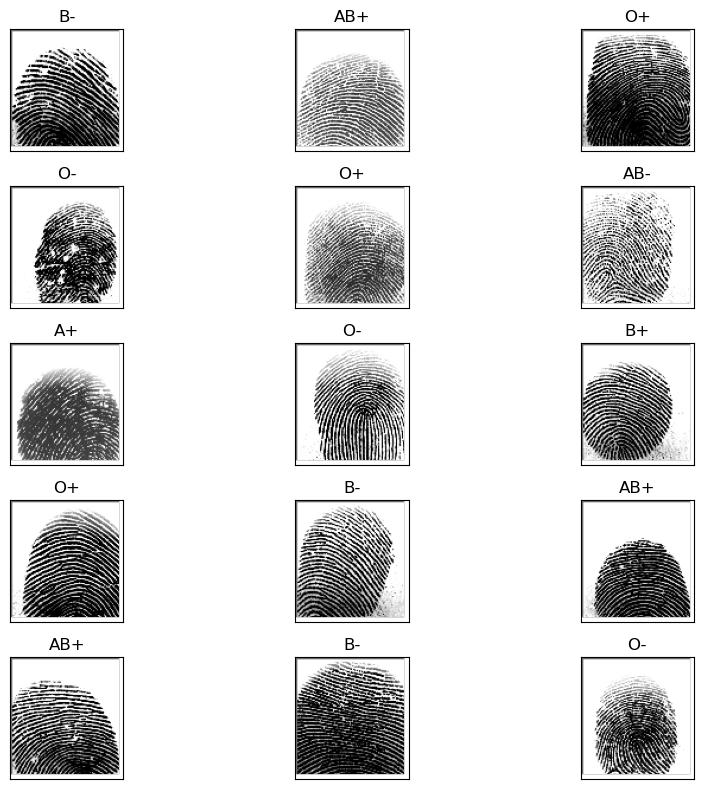

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])

plt.tight_layout()
plt.show()

In [14]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [15]:
train_gen = train_datagen.flow_from_dataframe(
  dataframe=train,
  x_col='Filepath',
  y_col= 'Label',
  target_size = (256,256),
  class_mode='categorical',
  batch_size = 32,
  shuffle = True,
  seed=42,
)

valid_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size = 32,
    shuffle = False,
    seed = 42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe = test,
    x_col='Filepath',
    y_col = 'Label',
    target_size = (256,256),
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False
)

Found 4500 validated image filenames belonging to 8 classes.
Found 1500 validated image filenames belonging to 8 classes.
Found 1500 validated image filenames belonging to 8 classes.


In [16]:
pretrained_model = ResNet50(
    input_shape = (256,256,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [17]:
inputs = pretrained_model.input
x=Dense(128, activation='relu')(pretrained_model.output)
x=Dense(128, activation='relu')(x)

outputs = Dense(8, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
my_callbacks = [EarlyStopping(monitor = 'val_accuracy',
min_delta=0,
patience=2,
mode='auto')]

In [20]:
history = model.fit(
    train_gen,
    validation_data = valid_gen,
    epochs=25
)

Epoch 1/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.4078 - loss: 1.5443 - val_accuracy: 0.6473 - val_loss: 0.8914
Epoch 2/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.6816 - loss: 0.8362 - val_accuracy: 0.6953 - val_loss: 0.7682
Epoch 3/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.7602 - loss: 0.6479 - val_accuracy: 0.7467 - val_loss: 0.6350
Epoch 4/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.7778 - loss: 0.5587 - val_accuracy: 0.6893 - val_loss: 0.7823
Epoch 5/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.7830 - loss: 0.5228 - val_accuracy: 0.7653 - val_loss: 0.5841
Epoch 6/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 397s 3s/step - accuracy: 0.8402 - loss: 0.4182 - val_accuracy: 0.7593 - val_loss: 0.6084
Epoch 7/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 429s 3s/step - accuracy: 0.8495 - loss: 0.3839 - val_accuracy: 0.7713 - val_loss: 0.5606
Epoch 8/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 431s 3s/step - accuracy: 0.8662 - loss: 0.3291 - val_accu

In [ ]:
model.save("model_blood_group_detection.h5")

In [22]:
model.save("model_blood_group_detection.keras")

In [25]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(valid_gen)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

47/47 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7779 - loss: 0.8380
Test Accuracy: 76.73%


In [26]:
# Generate predictions
predictions = model.predict(valid_gen)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = valid_gen.classes

47/47 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step


In [30]:
# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=valid_gen.class_indices.keys()))

Classification Report:
              precision    recall  f1-score   support

          A+       0.84      0.86      0.85       145
          A-       0.63      0.89      0.74       232
         AB+       0.71      0.94      0.81       168
         AB-       0.92      0.58      0.71       214
          B+       0.84      0.73      0.78       164
          B-       0.94      0.72      0.81       186
          O+       0.87      0.60      0.71       216
          O-       0.66      0.88      0.75       175

    accuracy                           0.77      1500
   macro avg       0.80      0.78      0.77      1500
weighted avg       0.80      0.77      0.77      1500



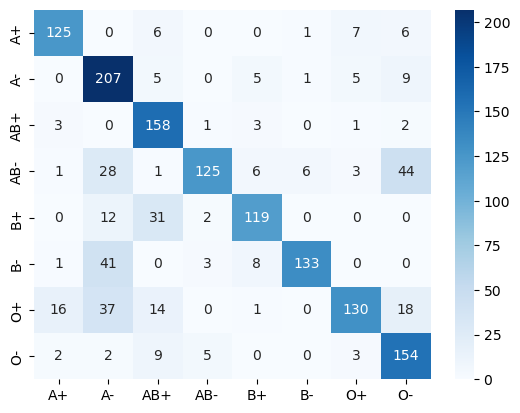

In [31]:
# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_gen.class_indices.keys(), yticklabels=valid_gen.class_indices.keys())
plt.show()

In [33]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Load the pre-trained model
model = load_model('model_blood_group_detection.h5')  # or 'your_model_name.keras'

img_path = r"dataset_blood_group\B+\cluster_2_90.BMP"

# Change target_size to match your model's expected input size (256x256)
img = image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[ 0  0 77  0 22  0  0  0]]
